# TEMPERATURE PREDICTION PROJECT

#### Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from scipy.stats import norm 
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv('Temperature_Prediction.csv')

First 5 entries

In [3]:
pd.pandas.set_option('display.max_columns',None)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

The dataset contains 7752 rows and 25 columns

Datatype of the features

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Column Names

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Information about the features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


# Missing Values

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

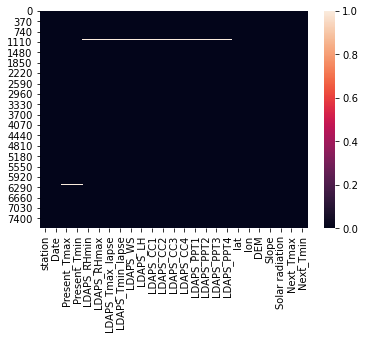

In [9]:
sns.heatmap(df.isnull())

In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [11]:
df.drop('Date',axis=1,inplace=True)

In [12]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Year                float64
Month               float64
Day                 float64
dtype: object

# Statistical Calculation

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


<AxesSubplot:>

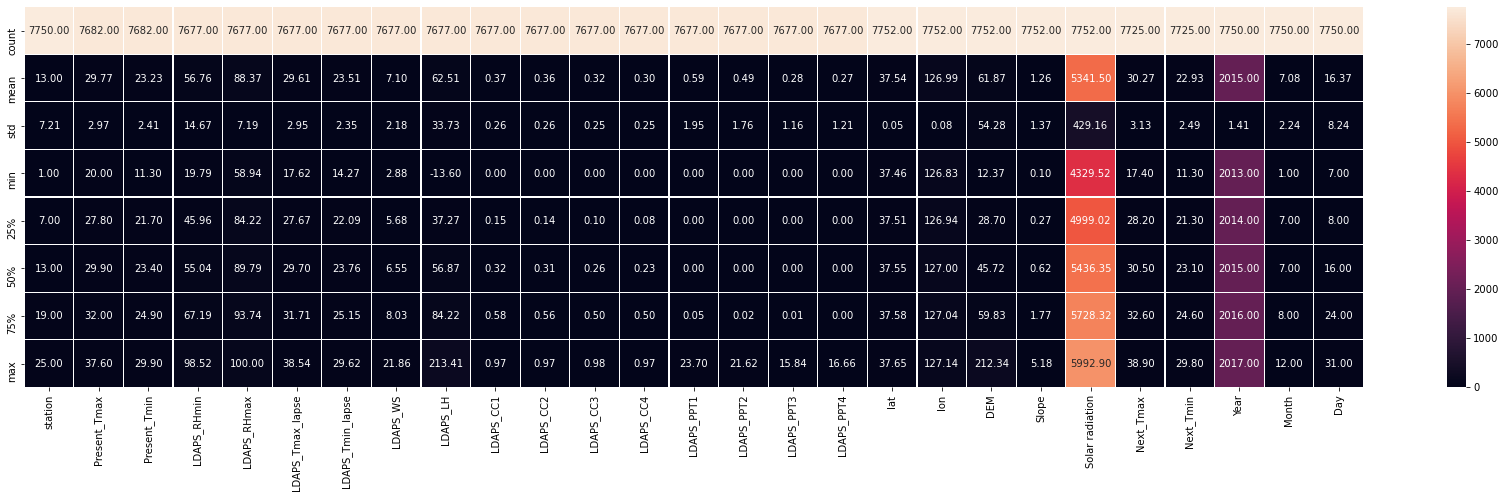

In [14]:
plt.figure(figsize=(30,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidths=0.1,linecolor='white')

# Checking Correlation

In [15]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
station,1.000000e+00,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,0.003414,0.000698,0.006159,-0.002748,-0.008369,-0.012671,-0.010580,-2.376097e-01,-1.187626e-01,-2.559703e-01,-9.011266e-02,-0.019011,0.108306,0.128719,0.000000e+00,9.230762e-18,-7.467287e-18
Present_Tmax,1.132114e-01,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,-0.215816,-0.145513,-0.142497,-0.110001,-0.100420,-0.121271,-0.101471,-5.277559e-02,9.074537e-03,-1.878551e-01,-1.060965e-01,-0.025557,0.613109,0.625252,6.025443e-02,-1.157174e-03,-1.447342e-01
Present_Tmin,1.324190e-01,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,0.091439,-0.002839,-0.045091,0.114312,0.069095,-0.046645,-0.064394,-7.871497e-02,-4.372508e-02,-2.512571e-01,-1.467365e-01,0.053828,0.473868,0.799758,3.771596e-02,-3.456627e-03,-1.090718e-01
LDAPS_RHmin,-6.712167e-02,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,8.752301e-02,-7.660834e-02,1.026120e-01,1.243464e-01,0.244795,-0.442958,0.095830,-2.056410e-03,-5.415582e-02,-6.637010e-02
LDAPS_RHmax,-1.680105e-01,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,1.967512e-01,2.579192e-02,1.780307e-01,2.206680e-01,0.149699,-0.286478,-0.072490,-1.427035e-01,-4.016063e-02,-1.311504e-02
LDAPS_Tmax_lapse,6.956068e-02,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-4.229788e-02,9.110723e-02,-1.797664e-01,-1.631227e-01,0.048111,0.836144,0.591535,1.627829e-02,-2.179181e-02,-1.617373e-01
LDAPS_Tmin_lapse,1.054220e-01,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-9.672557e-02,-2.683105e-02,-1.964069e-01,-1.867535e-01,0.160443,0.593195,0.886964,-4.723155e-03,-2.761879e-02,-1.794859e-01
LDAPS_WS,5.319869e-03,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,3.683553e-02,-5.975570e-02,1.919832e-01,1.724642e-01,0.122116,-0.346592,-0.097390,-1.122623e-01,-8.180250e-02,-2.944015e-02
LDAPS_LH,-1.342263e-01,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,1.338695e-01,2.594779e-02,5.540187e-02,8.720337e-02,-0.047523,0.159324,-0.055895,5.744957e-02,-2.285605e-02,-1.220235e-02
LDAPS_CC1,6.955762e-03,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-8.170208e-03,-6.876147e-03,-1.415893e-02,-2.085302e-02,0.218949,-0.457583,-0.011129,-6.683323e-02,-7.654068e-02,-2.029094e-02


<AxesSubplot:>

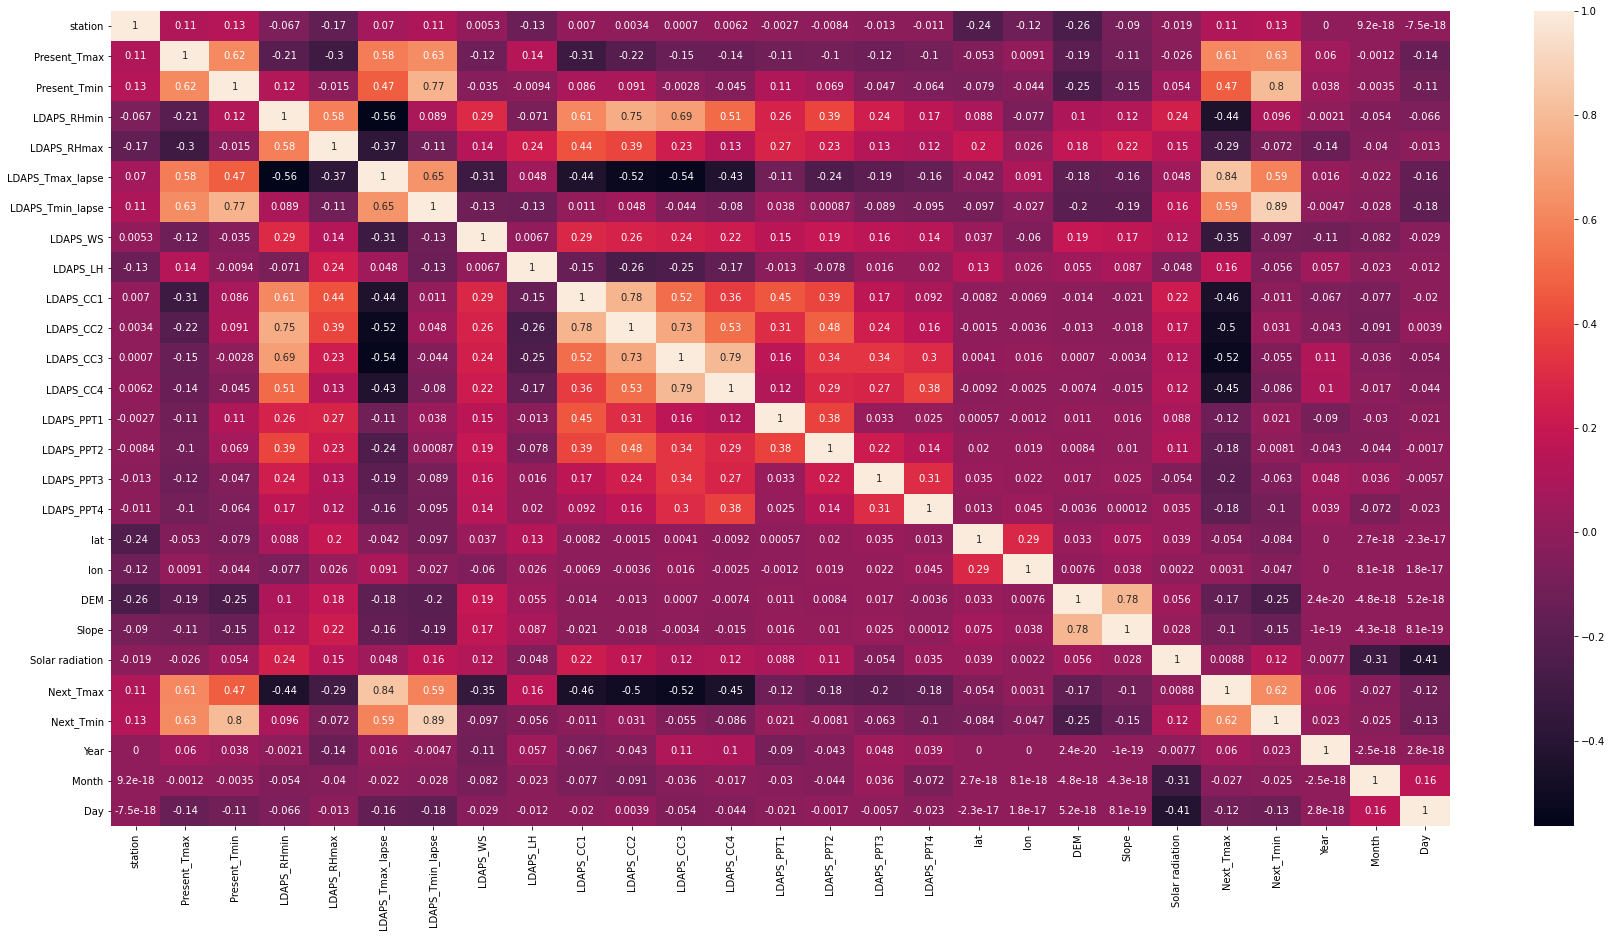

In [16]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)

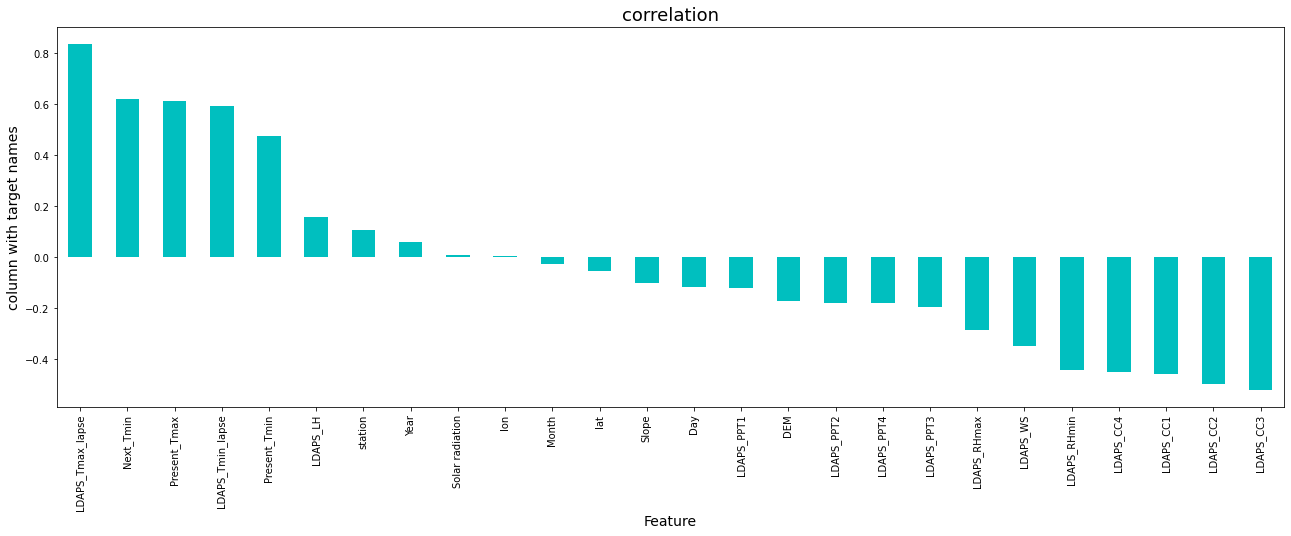

In [17]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color="c")
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

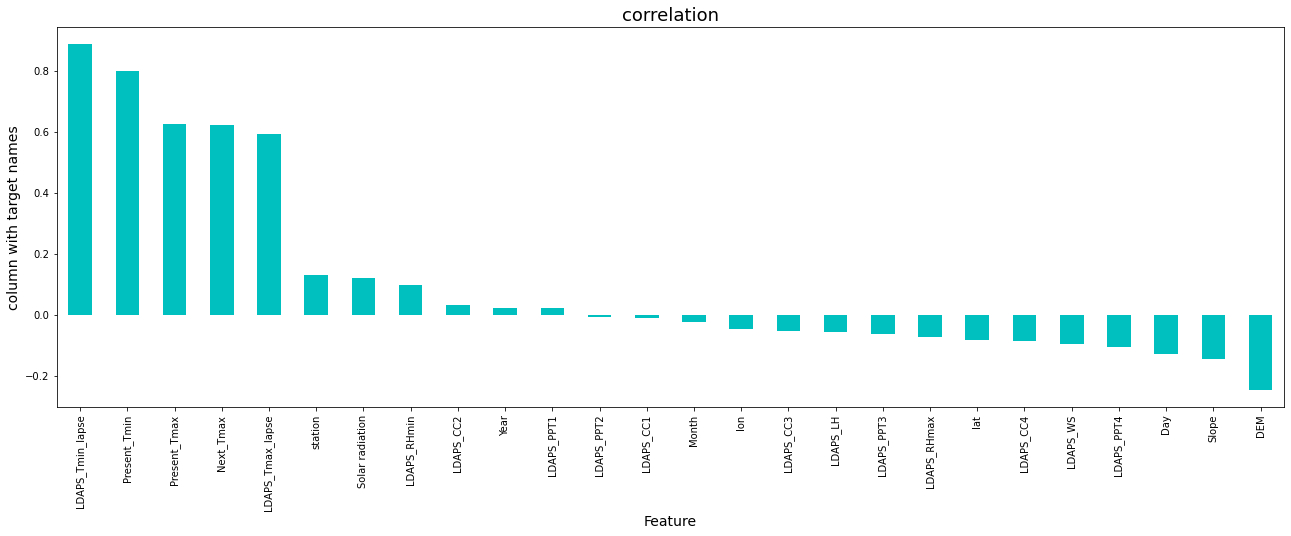

In [18]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color="c")
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Univariate Analysis

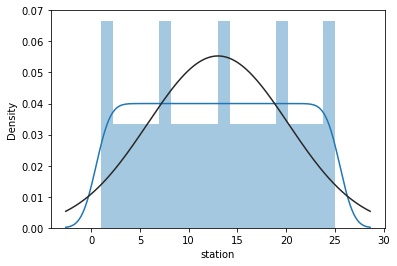

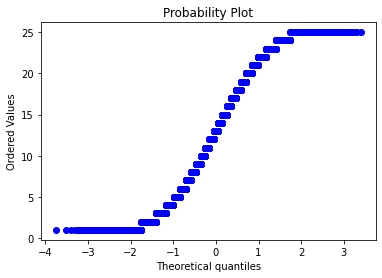

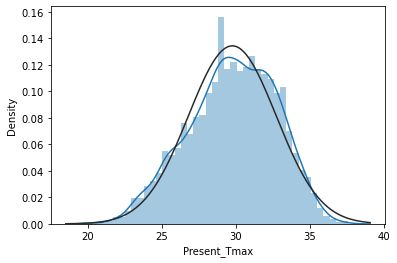

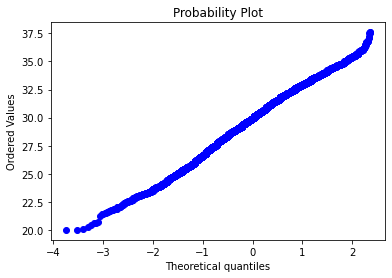

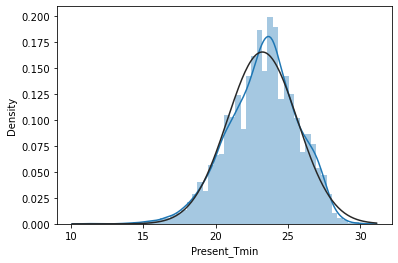

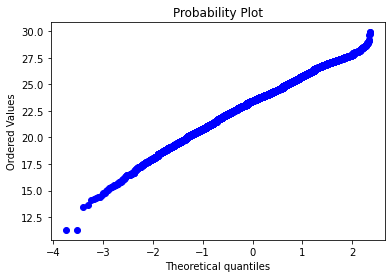

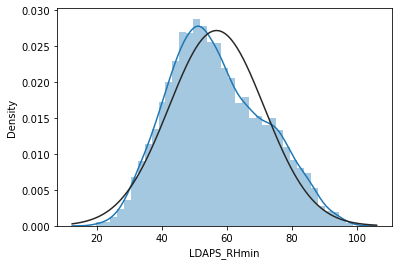

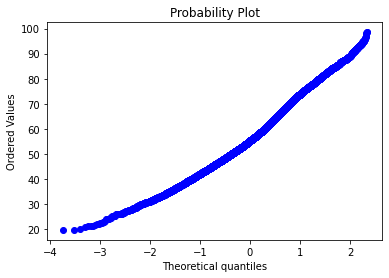

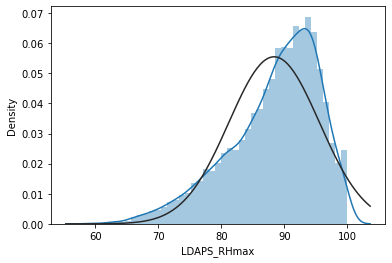

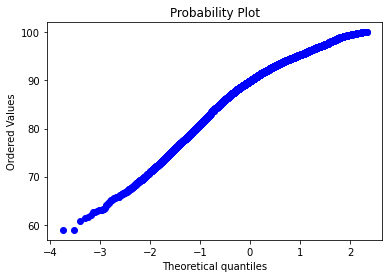

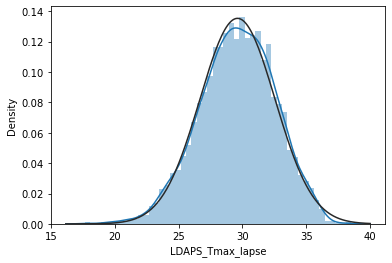

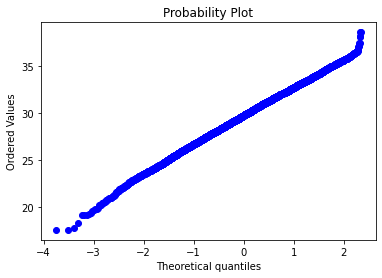

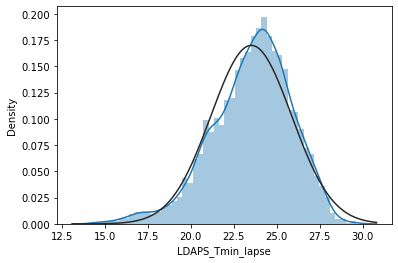

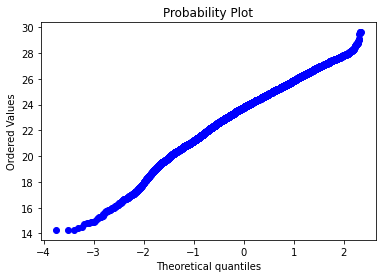

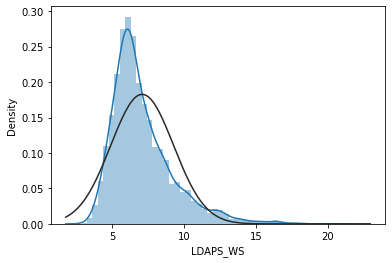

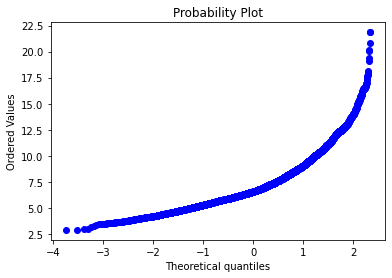

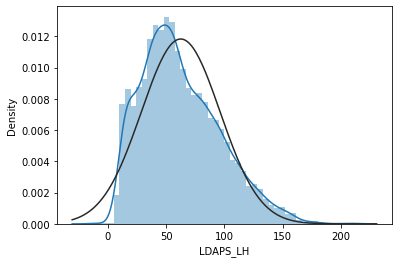

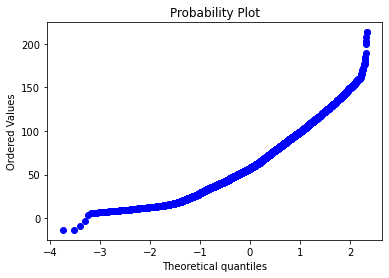

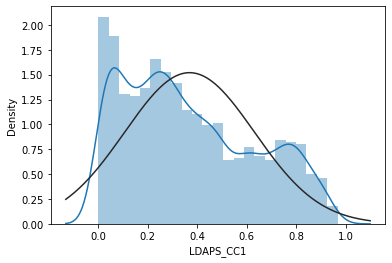

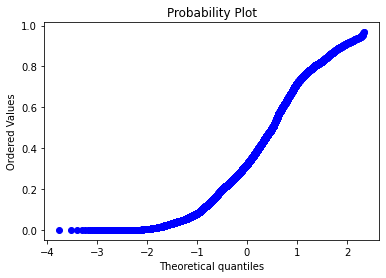

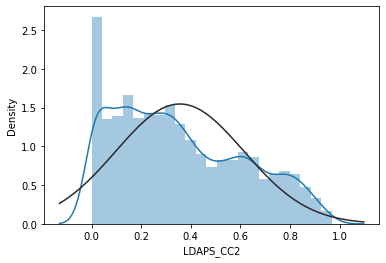

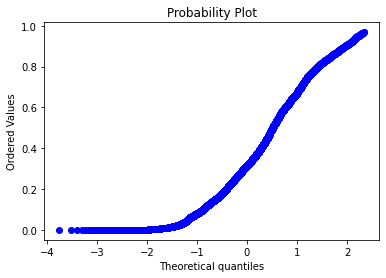

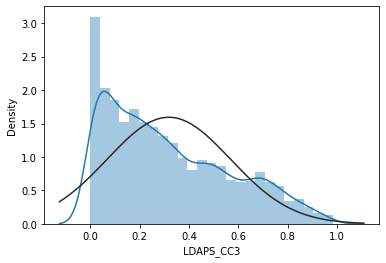

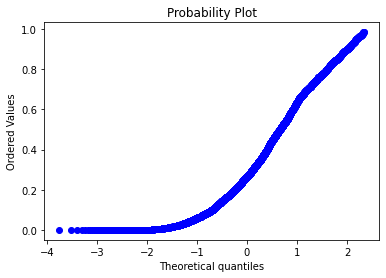

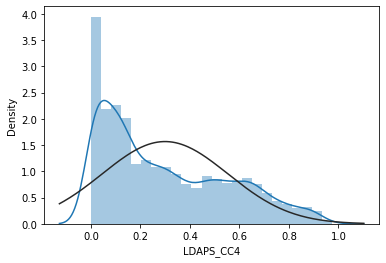

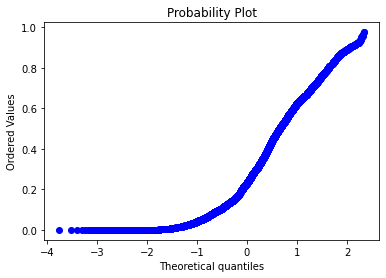

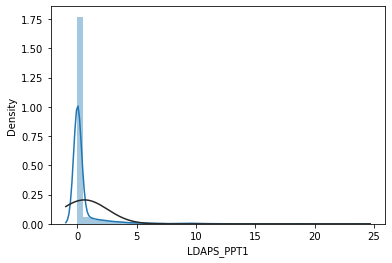

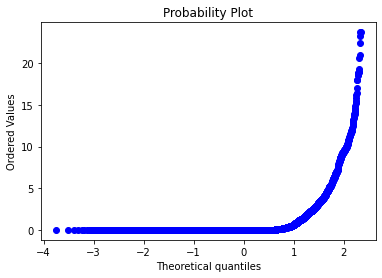

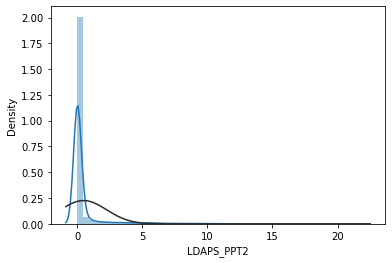

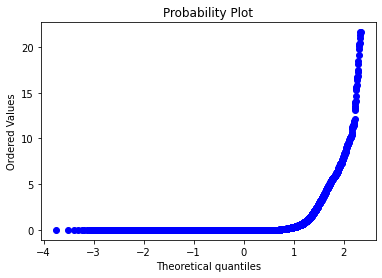

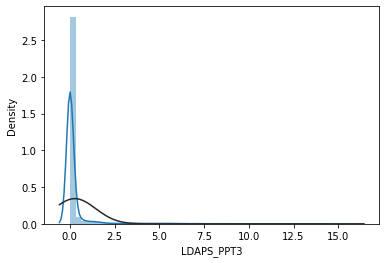

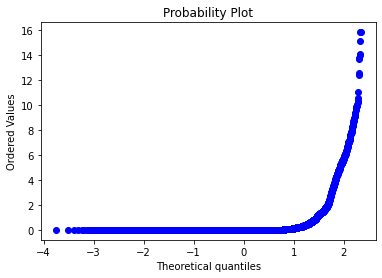

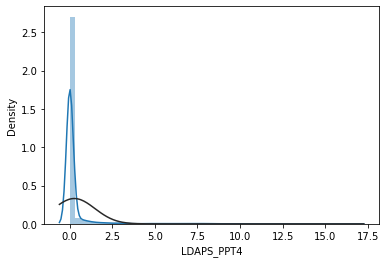

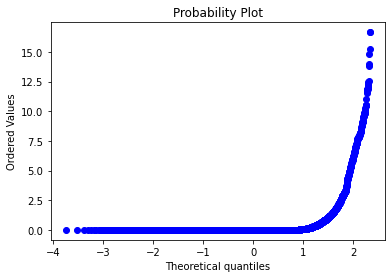

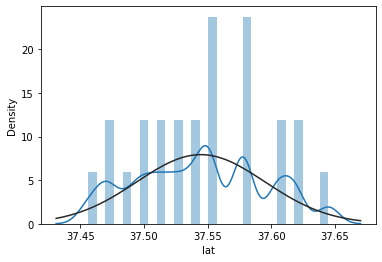

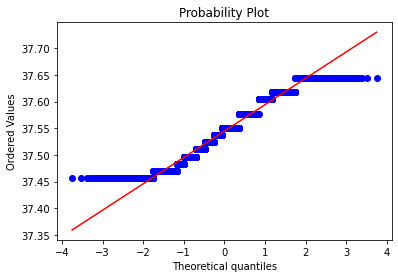

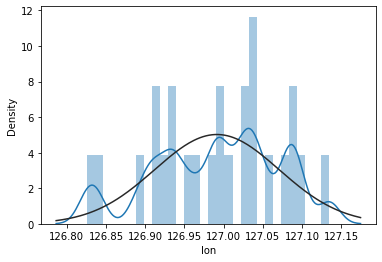

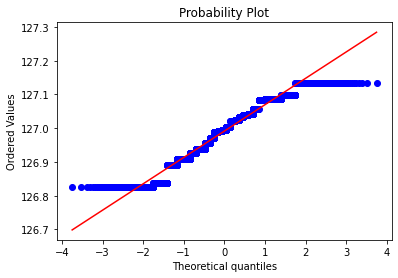

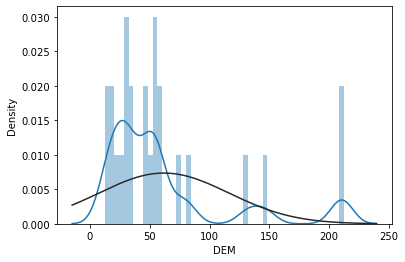

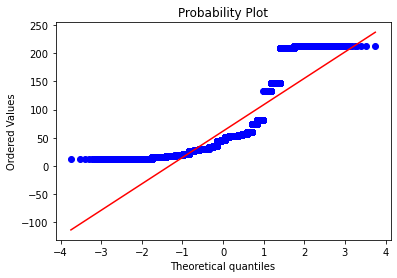

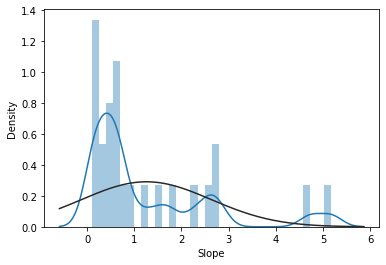

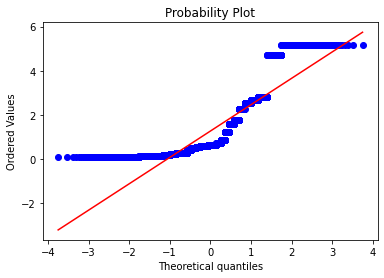

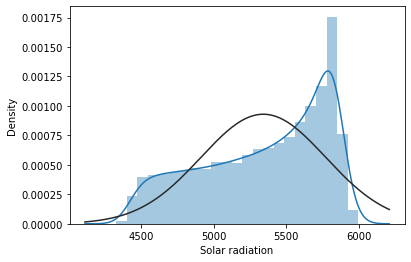

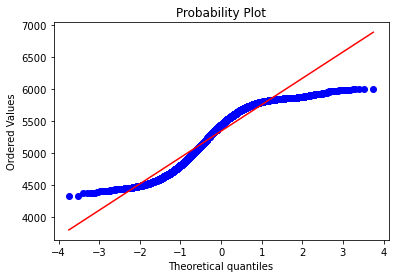

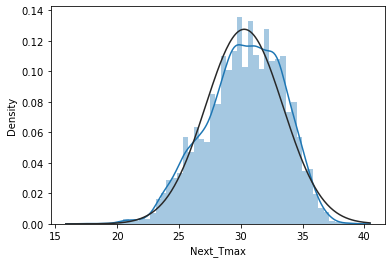

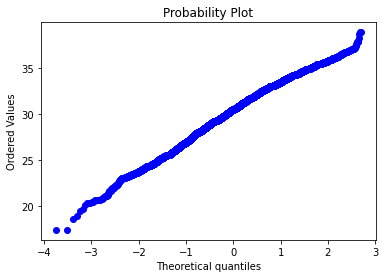

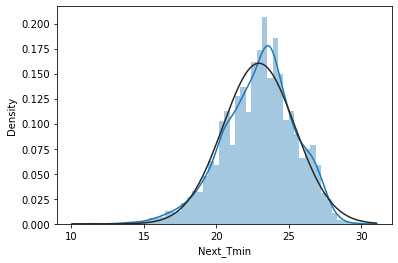

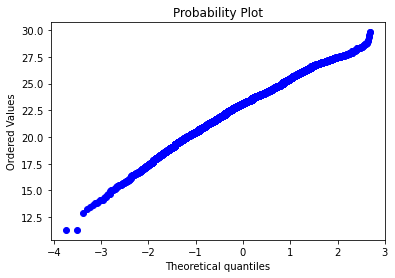

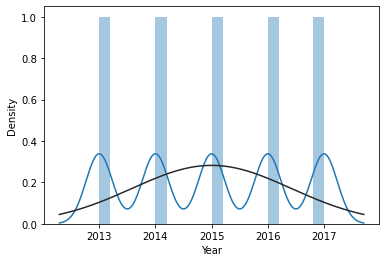

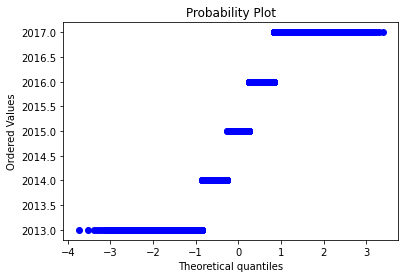

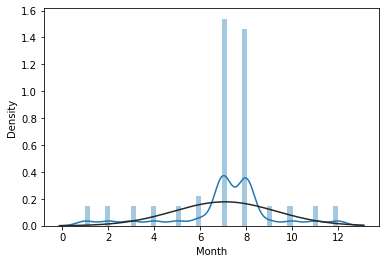

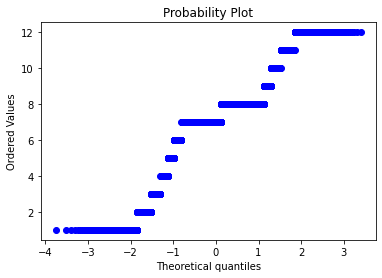

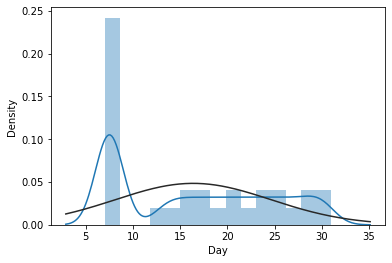

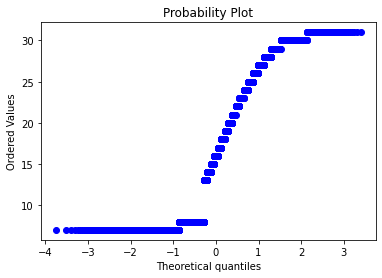

In [19]:
coll=df.columns.values
for i in range(0,len(coll)):
    plt.figure()
    sns.distplot(df[coll[i]],fit=norm)
    plt.figure()
    res=stats.probplot(df[coll[i]],plot=plt)
    

Highly Skewed:LDAPS-PPT1,LDAPS-PPT2,LDAPS-PPT3,LDAPS-PPT4

Negatively Skewed feature: Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,lon,Solar radiation,Next_Tmax,Next_Tmin,Month

# Box Plots showing outliers

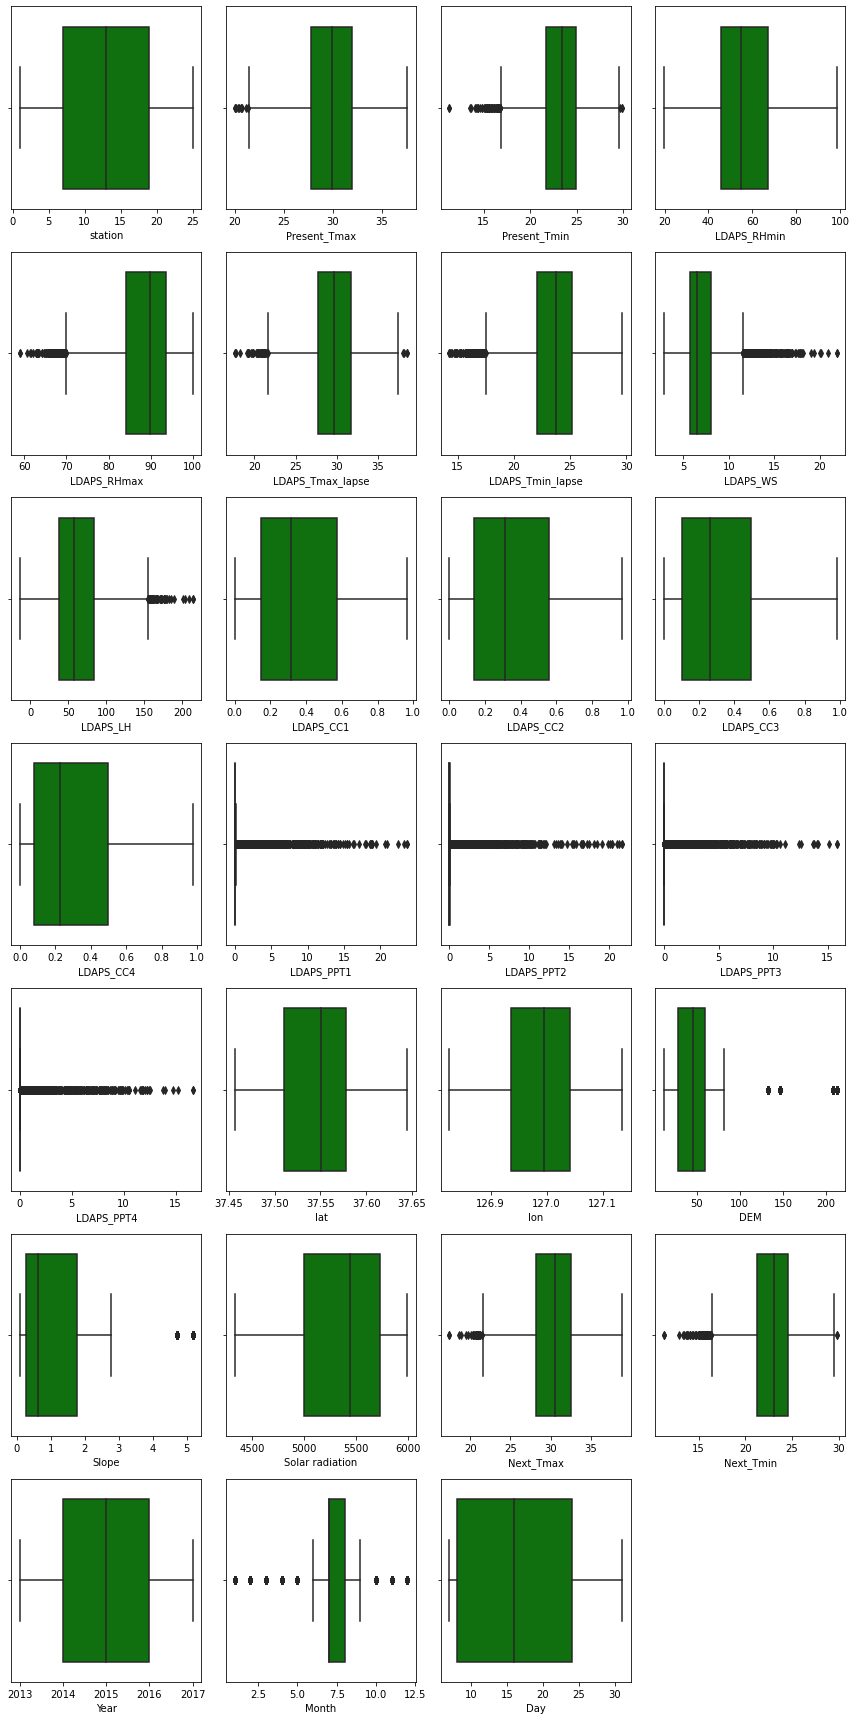

In [20]:
ncol=4
nrows=7
plt.figure(figsize=(12,6*ncol))
for i in range(0, len(coll)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[coll[i]],color='green',orient='v')
    plt.tight_layout()

# Bivariate Analysis

<AxesSubplot:xlabel='Next_Tmax', ylabel='Next_Tmin'>

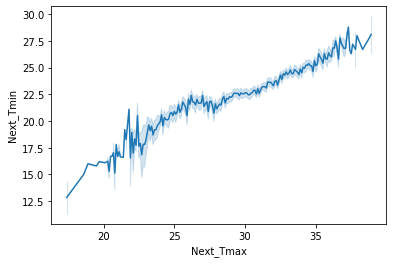

In [21]:
sns.lineplot(x="Next_Tmax",y="Next_Tmin",data=df)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

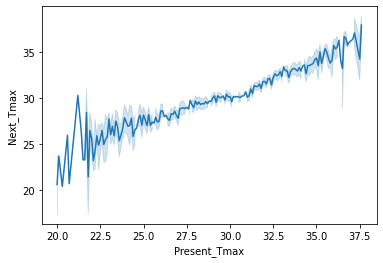

In [22]:
sns.lineplot(x="Present_Tmax",y="Next_Tmax",data=df)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmin'>

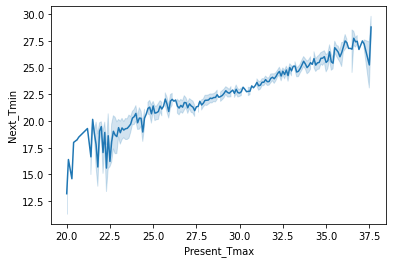

In [23]:
sns.lineplot(x="Present_Tmax",y="Next_Tmin",data=df)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

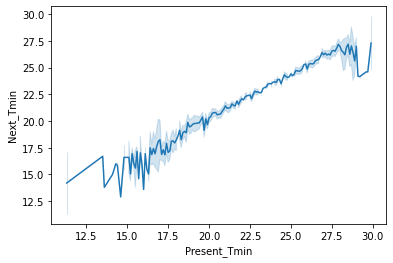

In [24]:
sns.lineplot(x="Present_Tmin",y="Next_Tmin",data=df)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmax'>

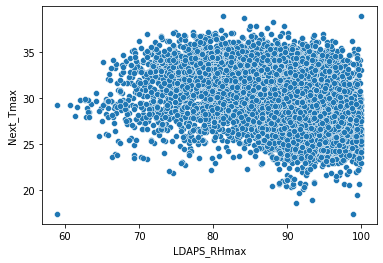

In [25]:
sns.scatterplot(x="LDAPS_RHmax",y="Next_Tmax",data=df)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmin'>

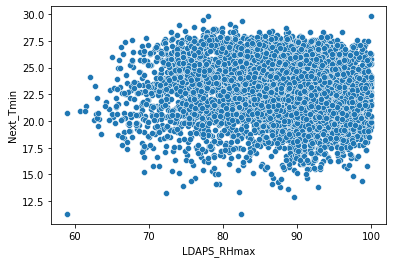

In [26]:
sns.scatterplot(x="LDAPS_RHmax",y="Next_Tmin",data=df)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

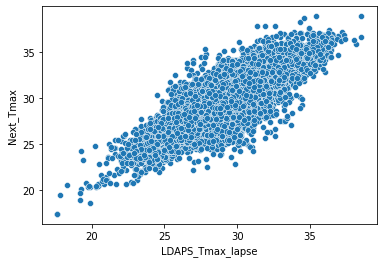

In [27]:
sns.scatterplot(x="LDAPS_Tmax_lapse",y="Next_Tmax",data=df)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

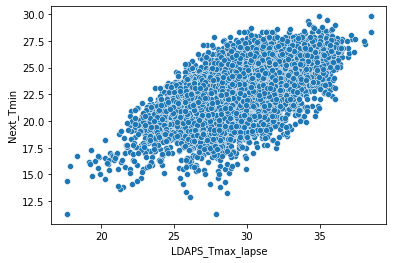

In [28]:
sns.scatterplot(x="LDAPS_Tmax_lapse",y="Next_Tmin",data=df)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmax'>

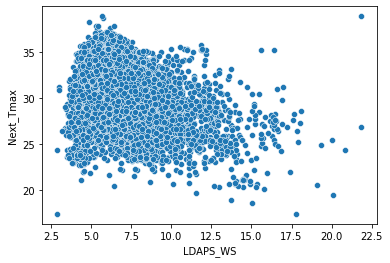

In [29]:
sns.scatterplot(x="LDAPS_WS",y="Next_Tmax",data=df)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmin'>

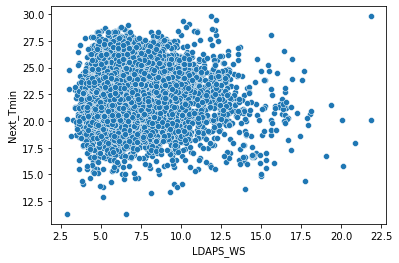

In [30]:
sns.scatterplot(x="LDAPS_WS",y="Next_Tmin",data=df)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmax'>

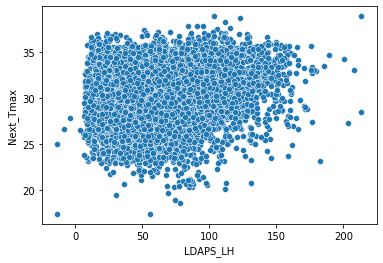

In [31]:
sns.scatterplot(x="LDAPS_LH",y="Next_Tmax",data=df)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

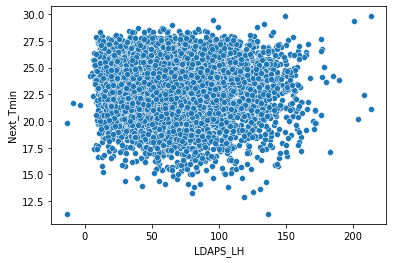

In [32]:
sns.scatterplot(x="LDAPS_LH",y="Next_Tmin",data=df)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

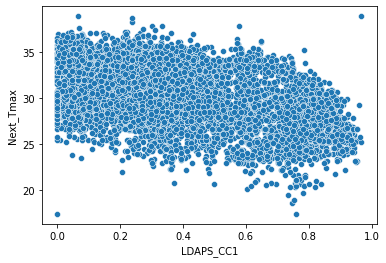

In [33]:
sns.scatterplot(x="LDAPS_CC1",y="Next_Tmax",data=df)

<AxesSubplot:xlabel='lat', ylabel='Next_Tmax'>

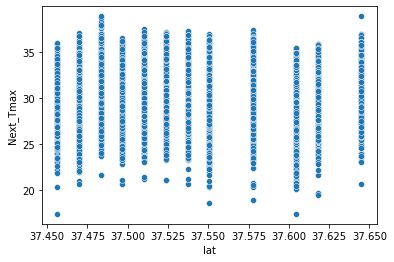

In [34]:
sns.scatterplot(x="lat",y="Next_Tmax",data=df)

<AxesSubplot:xlabel='lon', ylabel='Next_Tmax'>

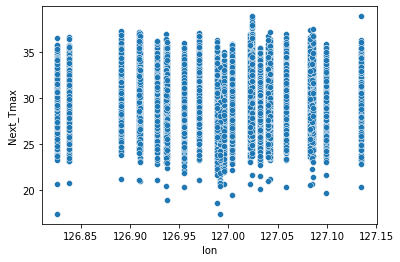

In [35]:
sns.scatterplot(x="lon",y="Next_Tmax",data=df)

<AxesSubplot:xlabel='DEM', ylabel='Next_Tmax'>

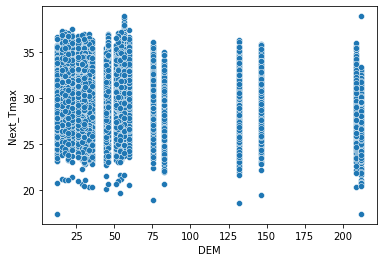

In [36]:
sns.scatterplot(x="DEM",y="Next_Tmax",data=df)

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmax'>

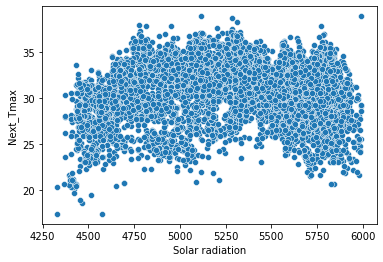

In [37]:
sns.scatterplot(x="Solar radiation",y="Next_Tmax",data=df)

There is linear Relation between:Next_Tmax and Next_Tmin,Present_Tmax and Next_Tmax,Present_Tmax and  Next_Tmin,Present_Tmin and Next_Tmin,LDAPS_Tmax_lapse and Next_Tmax,LDAPS_Tmax_lapse and Next_Tmin.  There is a constant relationship between lat and Next_Tmax,lon and Next_Tmax,DEM and Next_Tmax.
There is no specific relationship between the rest of the plots.

# Treating Missing Values

In [38]:
cols=('Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH',
      'LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax',
      'Next_Tmin')
for i in cols:
    df[i]=df[i].fillna(df[i].mean())
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [39]:
df.isnull().sum()

station             2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                2
Month               2
Day                 2
dtype: int64

In [40]:
df.dropna(inplace=True)

In [41]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

# Skewness

In [42]:
df.skew()

station             0.000000
Present_Tmax       -0.263013
Present_Tmin       -0.357565
LDAPS_RHmin         0.300229
LDAPS_RHmax        -0.850657
LDAPS_Tmax_lapse   -0.224207
LDAPS_Tmin_lapse   -0.579033
LDAPS_WS            1.556422
LDAPS_LH            0.667582
LDAPS_CC1           0.459193
LDAPS_CC2           0.471965
LDAPS_CC3           0.640088
LDAPS_CC4           0.665829
LDAPS_PPT1          5.324404
LDAPS_PPT2          5.713247
LDAPS_PPT3          6.368693
LDAPS_PPT4          6.743231
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Next_Tmax          -0.335956
Next_Tmin          -0.396873
Year                0.000000
Month              -0.705241
Day                 0.245482
dtype: float64

In [43]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


# Separating x(Independent) and y(target) variable.

In [44]:
X=df.drop(columns=["Next_Tmax","Next_Tmin"])
X.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013.0,6.0,30.0


In [45]:
y=df[['Next_Tmax','Next_Tmin']]

In [46]:
y.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


# Removing Skewness

In [47]:
for index in X.skew().index:
    if X.skew().loc[index]>0.5:
        X[index]=np.log1p(X[index])
    if X.skew().loc[index]<-0.5:
        X[index]=np.square(X[index])

In [48]:
X.skew()

station             0.000000
Present_Tmax       -0.263013
Present_Tmin       -0.357565
LDAPS_RHmin         0.300229
LDAPS_RHmax        -0.648715
LDAPS_Tmax_lapse   -0.224207
LDAPS_Tmin_lapse   -0.256788
LDAPS_WS            0.679982
LDAPS_LH           -0.257482
LDAPS_CC1           0.459193
LDAPS_CC2           0.471965
LDAPS_CC3           0.384522
LDAPS_CC4           0.440156
LDAPS_PPT1          2.737265
LDAPS_PPT2          3.167716
LDAPS_PPT3          3.989556
LDAPS_PPT4          4.205360
lat                 0.086942
lon                -0.285300
DEM                 0.443948
Slope               0.836180
Solar radiation    -0.417643
Year                0.000000
Month               0.776575
Day                 0.245482
dtype: float64

In [49]:
X.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,8302.191703,28.074101,529.319112,2.056542,18.104420,0.233947,0.203896,0.149882,0.123039,0.0,0.0,0.0,0.0,37.6046,126.991,5.362864,1.331046,3.591480e+07,2013.0,36.0,30.0
1,2.0,31.9,21.6,52.263397,8209.215480,29.850689,577.681673,1.900896,15.753842,0.225508,0.251771,0.147941,0.120204,0.0,0.0,0.0,0.0,37.6046,127.032,3.823463,0.414821,3.444883e+07,2013.0,36.0,30.0
2,3.0,31.6,23.3,48.690479,7051.563320,30.091292,603.470345,1.965464,9.433773,0.209344,0.257469,0.185725,0.132891,0.0,0.0,0.0,0.0,37.5776,127.058,3.535344,0.235941,3.438129e+07,2013.0,36.0,30.0
3,4.0,32.0,23.4,58.239788,9309.102118,29.704629,544.110547,1.894624,17.645140,0.216372,0.226002,0.149417,0.125970,0.0,0.0,0.0,0.0,37.6450,127.022,3.844087,1.262657,3.430404e+07,2013.0,36.0,30.0
4,5.0,31.4,21.9,56.174095,8127.947191,29.113934,551.614740,1.907318,22.005778,0.151407,0.249995,0.164575,0.157022,0.0,0.0,0.0,0.0,37.5507,127.135,3.584574,0.409125,3.433435e+07,2013.0,36.0,30.0


# Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [51]:
X.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,0.000000,0.494318,0.543011,0.488518,0.739856,0.499546,0.483391,0.394883,0.594567,0.241862,0.210559,0.218803,0.180827,0.0,0.0,0.0,0.0,0.786017,0.533981,1.000000,0.716295,1.000000,0.0,0.244755,0.958333
1,0.041667,0.676136,0.553763,0.412406,0.725611,0.584480,0.555188,0.307086,0.505585,0.233137,0.260000,0.215969,0.176662,0.0,0.0,0.0,0.0,0.786017,0.666667,0.444230,0.185791,0.914620,0.0,0.244755,0.958333
2,0.083333,0.659091,0.645161,0.367024,0.548235,0.595982,0.593473,0.343507,0.266336,0.216426,0.265884,0.271128,0.195307,0.0,0.0,0.0,0.0,0.643008,0.750809,0.340210,0.082217,0.910687,0.0,0.244755,0.958333
3,0.125000,0.681818,0.650538,0.488316,0.894136,0.577497,0.505350,0.303548,0.577181,0.223692,0.233388,0.218125,0.185136,0.0,0.0,0.0,0.0,1.000000,0.634304,0.451675,0.676697,0.906188,0.0,0.244755,0.958333
4,0.166667,0.647727,0.569892,0.462078,0.713159,0.549257,0.516490,0.310708,0.742255,0.156529,0.258165,0.240253,0.230771,0.0,0.0,0.0,0.0,0.500530,1.000000,0.357983,0.182493,0.907953,0.0,0.244755,0.958333


In [53]:
X.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            3
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Year                0
Month               0
Day                 0
dtype: int64

In [54]:
X['LDAPS_LH'].fillna(X['LDAPS_LH'].mean(),inplace=True)

# Finding the best random state

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [55]:
maxacc=0
maxrs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.22,random_state=i)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred=dtr.predict(x_test)
    r2_sc=r2_score(y_test,pred)
    if r2_sc>maxacc:
        maxacc=r2_sc
        maxrs=i
print('best r2_sc is:',maxacc,' at random state', maxrs)

best r2_sc is: 0.8042749004652664  at random state 118


# Train Test Split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=118)

# Model Selection

In [58]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [59]:
lm.score(x_train,y_train)

0.8026249637849922

In [60]:
pred=lm.predict(x_test)
print("Predicted Price:",pred)
print("Actual Price:",y_test)

Predicted Price: [[30.44150205 25.5002351 ]
 [31.78775684 24.8135341 ]
 [33.37649037 25.98097531]
 ...
 [26.06968868 21.81862445]
 [26.85933459 21.80462994]
 [28.9868237  20.84609319]]
Actual Price:       Next_Tmax  Next_Tmin
5252       31.4       26.6
748        30.7       24.1
871        33.5       25.9
6041       33.4       21.0
2589       28.1       17.9
...         ...        ...
3086       28.2       19.6
1948       31.9       23.8
305        26.1       22.7
2745       26.0       23.2
3575       27.5       21.9

[2325 rows x 2 columns]


In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print("r2 Score:",r2_score(y_test,pred))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 Score: 0.7884187381587926
Error:
Mean Absolute Error: 0.9971046833469324
Mean Squared Error: 1.7706426325247624
Root Mean Squared Error: 1.3306549637395724


In [62]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [63]:
dtr.score(x_train,y_train)

1.0

In [64]:
dtr.score(x_test,y_test)

0.7643576028909747

In [65]:
preddtr=dtr.predict(x_test)
print("Predicted Sales:",preddtr)
print("Actual Sales:",y_test)

Predicted Sales: [[32.4 26.5]
 [30.  23.6]
 [33.3 26.9]
 ...
 [26.  22.4]
 [25.5 23.4]
 [29.3 20.5]]
Actual Sales:       Next_Tmax  Next_Tmin
5252       31.4       26.6
748        30.7       24.1
871        33.5       25.9
6041       33.4       21.0
2589       28.1       17.9
...         ...        ...
3086       28.2       19.6
1948       31.9       23.8
305        26.1       22.7
2745       26.0       23.2
3575       27.5       21.9

[2325 rows x 2 columns]


In [66]:
print("r2 Score:",r2_score(y_test,preddtr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y_test,preddtr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,preddtr)))

r2 Score: 0.7643576028909747
Error:
Mean Absolute Error: 0.9911811699203095
Mean Squared Error: 1.9099010815692612
Root Mean Squared Error: 1.3819917082129187


In [68]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [69]:
rfr.score(x_train,y_train)

0.9853121442126137

In [70]:
predrfr=rfr.predict(x_test)
print("Predicted Sales:",predrfr)
print("Actual Sales:",y_test)

Predicted Sales: [[31.907 25.693]
 [30.795 23.835]
 [33.52  26.417]
 ...
 [25.934 22.601]
 [25.772 22.47 ]
 [30.06  22.303]]
Actual Sales:       Next_Tmax  Next_Tmin
5252       31.4       26.6
748        30.7       24.1
871        33.5       25.9
6041       33.4       21.0
2589       28.1       17.9
...         ...        ...
3086       28.2       19.6
1948       31.9       23.8
305        26.1       22.7
2745       26.0       23.2
3575       27.5       21.9

[2325 rows x 2 columns]


In [71]:
print("r2 Score:",r2_score(y_test,predrfr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predrfr)))

r2 Score: 0.8962843231125354
Error:
Mean Absolute Error: 0.6825973497303124
Mean Squared Error: 0.8343386586436158
Root Mean Squared Error: 0.9134214025539449


# Cross Validation

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(lm,X,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.7969941032229648

In [75]:
from sklearn.model_selection import KFold
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(dtr,X,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.7680837059105408

In [76]:
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(rfr,X,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.901778591812571

### As the least difference between accuracy and cross validation score is for DecisionTreeRegressor it is our best model.

# Hyperparameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV
parameters={'splitter':['best', 'random'],'max_depth':list(np.arange(1,10)),
            'min_samples_split':list(np.arange(1,11)),'min_samples_leaf':list(np.arange(1,10))}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 10, 'splitter': 'best'}


In [78]:
dt=DecisionTreeRegressor(max_depth=9,min_samples_split=10,min_samples_leaf=7,splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

R2 score: 79.59212073345854


# Saving the model

In [79]:
import pickle
filename='Temp.pkl'
pickle.dump(dt,open(filename,'wb'))

# Prediction

In [80]:
loaded_model=pickle.load(open('Temp.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.7959212073345854


In [81]:
loaded_model.predict(x_test)

array([[32.43055556, 26.075     ],
       [31.25333333, 23.82666667],
       [33.61304348, 26.44347826],
       ...,
       [25.67916667, 22.5875    ],
       [25.2375    , 22.425     ],
       [30.52013889, 23.21458333]])